In [59]:
import numpy as np
import matplotlib.pyplot as plt
from bethe_lattice import bethe_green_function
from mesh import Meshiw, Meshitau
from green_function import Giw, make_Gtau_from_Giw
from monte_carlo import monte_carlo_sampling

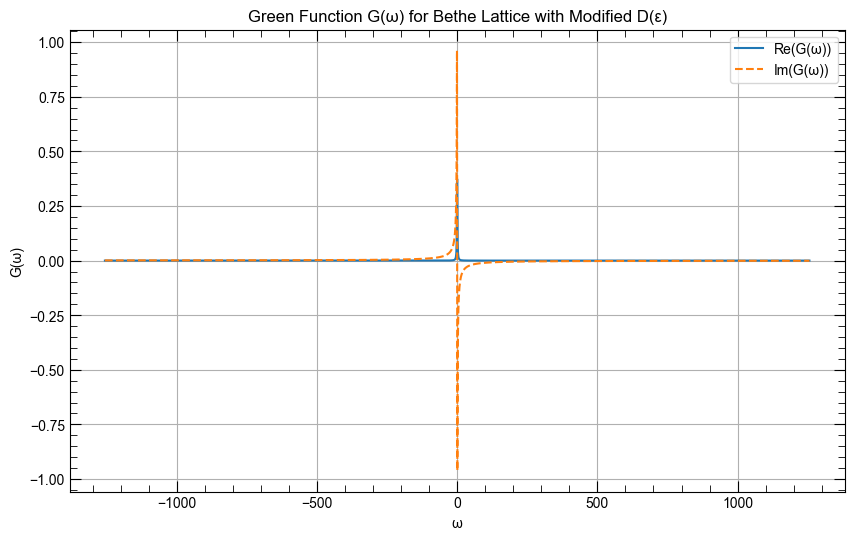

In [60]:
# パラメータの設定
W = 1.0  # 帯域幅
D_0 = 2.0 / np.pi  # 正規化定数 (D_0 = 2/π を仮定)
delta = 0.00  # 正の無限小量
beta = 5  # 逆温度
U = 0.7  # 相互作用

# マツバラ周波数の定義
meshiw = Meshiw(beta, 1000)

# グリーン関数の計算
giw_values = np.array(
    [bethe_green_function(1.0j * omega, W, D_0, delta) for omega in meshiw.iw]
)
giw_values = 1 / (1 / giw_values + U / 2)
giw = Giw(meshiw, giw_values)

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(giw.meshiw.iw, giw.giw_value.real, label="Re(G(ω))")
plt.plot(giw.meshiw.iw, giw.giw_value.imag, label="Im(G(ω))", linestyle="dashed")
plt.xlabel("ω")
plt.ylabel("G(ω)")
plt.title("Green Function G(ω) for Bethe Lattice with Modified D(ε)")
plt.legend()
plt.grid(True)
plt.show()

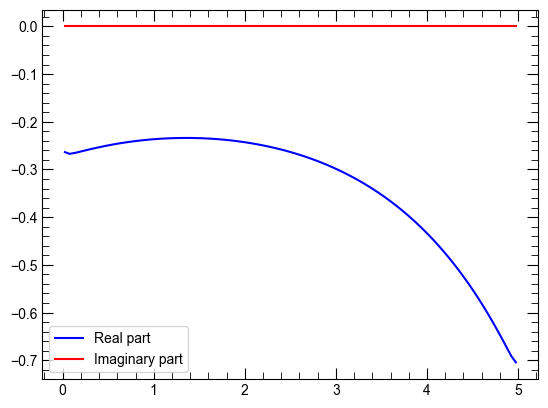

In [61]:
# Gtauへの変換
gtau = make_Gtau_from_Giw(giw, 100)

# プロット (imaginary time)
fig, ax = plt.subplots()
ax.plot(gtau.meshitau.tau, np.real(gtau.gtau_value), "b-", label="Real part")
ax.plot(gtau.meshitau.tau, np.imag(gtau.gtau_value), "r-", label="Imaginary part")
ax.legend()

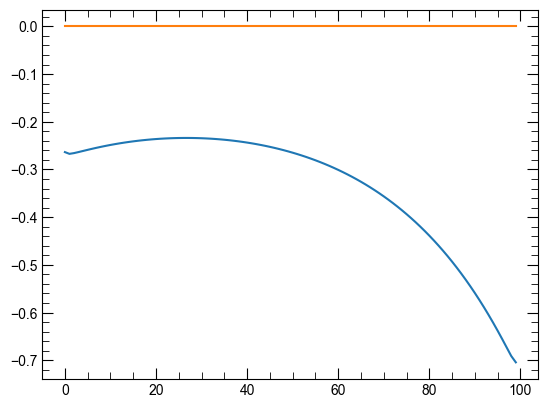

In [62]:
# g0_tauの計算
n_tau = 100
gtau = make_Gtau_from_Giw(giw, n_tau)
g0_tau = np.zeros((n_tau, n_tau), dtype=complex)
delta_tau = beta / n_tau
for i in range(n_tau):
    for j in range(n_tau):
        g0_tau[i, j] = gtau.gtau_value[i - j] * np.where(
            i - j > 0, 1, np.where(i - j < 0, -1, 1)
        )
# g0_tauのプロット
fig, ax = plt.subplots()
ax.plot(g0_tau[:, 0].real, label="Real part")
ax.plot(g0_tau[:, 0].imag, label="Imaginary part")

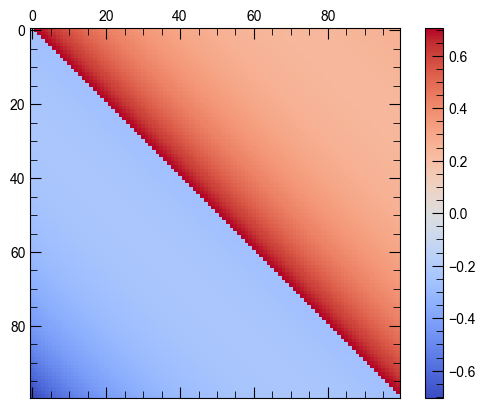

In [63]:
# g0_tauの２次元のヒートマップを描画
fig, ax = plt.subplots()
cax = ax.matshow(g0_tau.real, cmap="coolwarm")
fig.colorbar(cax)
plt.show()

In [64]:
# 相互作用の設定
U = 0.7
n_warmup = 1000
n_cycle = 5000
g_up, g_dn = monte_carlo_sampling(
    g0_tau, U, delta_tau, n_tau, n_warmup=n_warmup, n_cycle=n_cycle
)

n_warmup: 0
n_warmup: 1
n_warmup: 2
n_warmup: 3
n_warmup: 4
n_warmup: 5
n_warmup: 6
n_warmup: 7
n_warmup: 8
n_warmup: 9
n_warmup: 10
n_warmup: 11
n_warmup: 12
n_warmup: 13
n_warmup: 14
n_warmup: 15
n_warmup: 16
n_warmup: 17
n_warmup: 18
n_warmup: 19
n_warmup: 20
n_warmup: 21
n_warmup: 22
n_warmup: 23
n_warmup: 24
n_warmup: 25
n_warmup: 26
n_warmup: 27
n_warmup: 28
n_warmup: 29
n_warmup: 30
n_warmup: 31
n_warmup: 32
n_warmup: 33
n_warmup: 34
n_warmup: 35
n_warmup: 36
n_warmup: 37
n_warmup: 38
n_warmup: 39
n_warmup: 40
n_warmup: 41
n_warmup: 42
n_warmup: 43
n_warmup: 44
n_warmup: 45
n_warmup: 46
n_warmup: 47
n_warmup: 48
n_warmup: 49
n_warmup: 50
n_warmup: 51
n_warmup: 52
n_warmup: 53
n_warmup: 54
n_warmup: 55
n_warmup: 56
n_warmup: 57
n_warmup: 58
n_warmup: 59
n_warmup: 60
n_warmup: 61
n_warmup: 62
n_warmup: 63
n_warmup: 64
n_warmup: 65
n_warmup: 66
n_warmup: 67
n_warmup: 68
n_warmup: 69
n_warmup: 70
n_warmup: 71
n_warmup: 72
n_warmup: 73
n_warmup: 74
n_warmup: 75
n_warmup: 76
n_warmup:

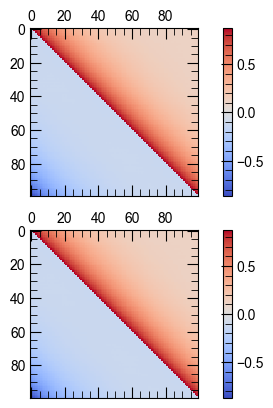

In [65]:
# 平均化されたグリーン関数のプロット
fig, ax = plt.subplots(2, 1)

cax = ax[0].matshow(g_up.real, cmap="coolwarm")
fig.colorbar(cax, ax=ax[0])

cax = ax[1].matshow(g_dn.real, cmap="coolwarm")
fig.colorbar(cax, ax=ax[1])

plt.show()

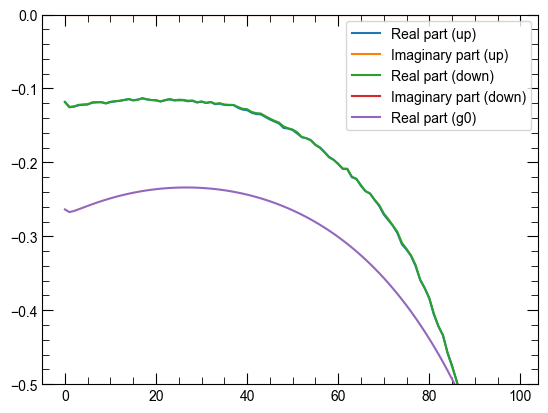

In [66]:
fig, ax = plt.subplots()
ax.plot(g_up[:, 0].real, label="Real part (up)")
ax.plot(g_up[:, 0].imag, label="Imaginary part (up)")
ax.plot(g_dn[:, 0].real, label="Real part (down)")
ax.plot(g_dn[:, 0].imag, label="Imaginary part (down)")
ax.plot(g0_tau[:, 0].real, label="Real part (g0)")
ax.set_ylim(-0.5, 0.0)
ax.legend()
plt.show()

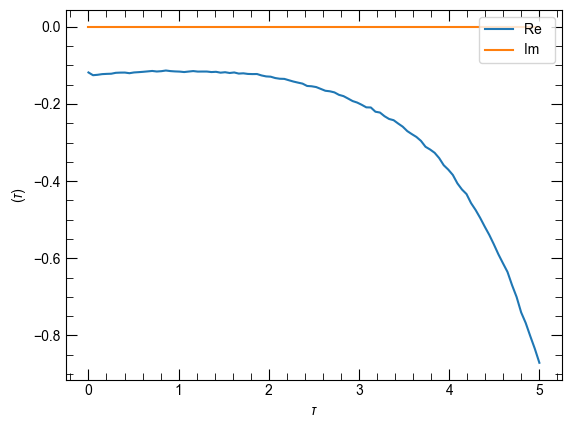

In [68]:
from triqs.gf import Gf
from triqs.plot.mpl_interface import oplot, plt

# A uniform real-frequency mesh on a given interval
from triqs.gf import MeshReFreq, MeshImFreq, MeshImTime

tau_mesh = MeshImTime(beta=beta, S="Fermion", n_tau=n_tau)
G = Gf(mesh=tau_mesh, target_shape=[])
G.data[0] = g_up[0, 0]
for i in range(n_tau):
    G.data[i] = g_up[i, 0]
oplot(G)

In [69]:
err = 1.0e-5
from triqs_maxent import *

tm = TauMaxEnt(cost_function="bryan", probability="normal")
tm.set_G_tau(G)
tm.set_error(10 * err)
res = tm.run()

2024-08-17 16:23:11.929125
MaxEnt run
TRIQS application maxent
Copyright(C) 2018 Gernot J. Kraberger
Copyright(C) 2018 Simons Foundation
Authors: Gernot J. Kraberger and Manuel Zingl
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistributeit under certain conditions; see file LICENSE.
Please cite this code and the appropriate original papers (see documentation).

Minimal chi2: 18373.61955368589
scaling alpha by a factor 100 (number of data points)
alpha[ 0] =   2.00000000e+03, chi2 =   6.53407148e+04, n_iter=      95 
alpha[ 1] =   1.05203071e+03, chi2 =   6.50308817e+04, n_iter=      54 
alpha[ 2] =   5.53384306e+02, chi2 =   6.47607999e+04, n_iter=      74 
alpha[ 3] =   2.91088642e+02, chi2 =   6.45474389e+04, n_iter=     109 
alpha[ 4] =   1.53117095e+02, chi2 =   6.44195583e+04, n_iter=     145 
alpha[ 5] =   8.05419429e+01, chi2 =   6.43610704e+04, n_iter=     175 
alpha[ 6] =   4.23662987e+01, chi2 =   6.43463321e+04, n_iter=    

('Curvature: ', 3)
('LineFit: ', 4)
('Classic: ', 13)


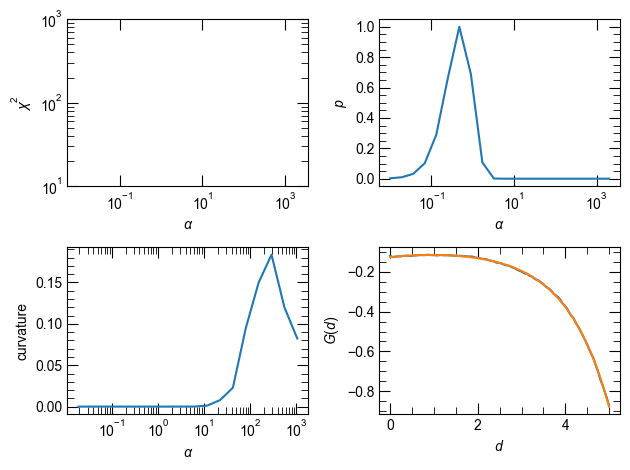

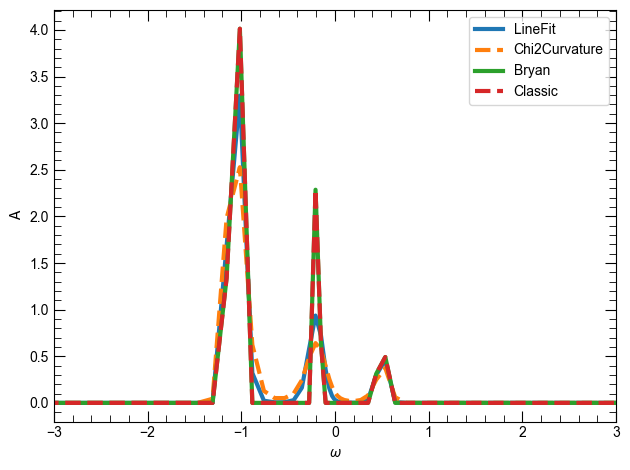

In [70]:
from triqs.plot.mpl_interface import oplot

fig1 = plt.figure()
# chi2(alpha) and linefit
plt.subplot(2, 2, 1)
res.analyzer_results["LineFitAnalyzer"].plot_linefit()
res.plot_chi2()
plt.ylim(1e1, 1e3)
# curvature(alpha)
plt.subplot(2, 2, 3)
res.analyzer_results["Chi2CurvatureAnalyzer"].plot_curvature()
# probablity(alpha)
plt.subplot(2, 2, 2)
res.plot_probability()
# backtransformed G_rec(tau) and original G(tau)
# by default (plot_G=True) also original G(tau) is plotted
plt.subplot(2, 2, 4)
res.plot_G_rec(alpha_index=5)
plt.tight_layout()

# spectral function A
fig2 = plt.figure()
# oplot(G_w, mode='S', color='k', lw=3, label='Original Model')
plt.plot(
    res.omega,
    res.analyzer_results["LineFitAnalyzer"]["A_out"],
    "-",
    lw=3,
    label="LineFit",
)
plt.plot(
    res.omega,
    res.analyzer_results["Chi2CurvatureAnalyzer"]["A_out"],
    "--",
    lw=3,
    label="Chi2Curvature",
)
plt.plot(
    res.omega, res.analyzer_results["BryanAnalyzer"]["A_out"], "-", lw=3, label="Bryan"
)
plt.plot(
    res.omega,
    res.analyzer_results["ClassicAnalyzer"]["A_out"],
    "--",
    lw=3,
    label="Classic",
)

plt.legend()
plt.xlim(-3, 3)
# plt.ylim(0, 0.6)
plt.ylabel("A")
plt.xlabel(r"$\omega$")
plt.tight_layout()

# print the optimal alpha-values
print(("Curvature: ", res.analyzer_results["Chi2CurvatureAnalyzer"]["alpha_index"]))
print(("LineFit: ", res.analyzer_results["LineFitAnalyzer"]["alpha_index"]))
print(("Classic: ", res.analyzer_results["ClassicAnalyzer"]["alpha_index"]))

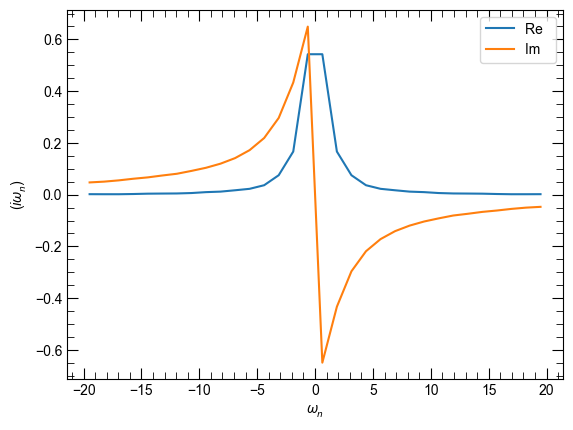

In [71]:
Giw2 = make_gf_from_fourier(G)
oplot(Giw2)

In [72]:
# A uniform real-frequency mesh on a given interval
from triqs.gf import MeshReFreq

w_mesh = MeshReFreq(window=(-4, 4), n_w=1000)
Gw = Gf(mesh=w_mesh, target_shape=[])
Gw.set_from_pade(Giw2)

RuntimeError: .. Error occurred at Sat Aug 17 16:23:13 2024

.. Error .. calling C++ overload 
.. set_from_pade(gf_view<refreq,scalar_valued> gw, gf_view<imfreq,scalar_valued> giw, int n_points, double freq_offset) -> void 
.. in implementation of function gf_fnt.set_from_pade
.. C++ error was : 
Triqs runtime error
    at /home/yamamoto/apps/triqs/triqs.src/c++/triqs/gfs/transform/pade.cpp : 36

Pade argument n_points (100) should be positive and not be greater than the positive number of Matsubara frequencies (16)

Exception was thrown on node 